In [1]:
import os
import platform
import pandas as pd
import numpy as np
from glob import glob

In [2]:
from tensorflow import keras

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
import utils
import models


Tensorflow version : 2.10.1

Tensorflow devices available : 
 [name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15771189179446765976
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 22439854080
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8292459354870456221
physical_device_desc: "device: 0, name: NVIDIA RTX A5000, pci bus id: 0000:61:00.0, compute capability: 8.6"
xla_global_id: 416903419
]

Tensorflow physical devices available : 
 [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## MRNet Sagittal Plane

In [5]:
mrnet_dataset_dir = 'Data/MRNet-v1.0'
mrnet_train_path = os.path.join(mrnet_dataset_dir, 'train')
mrnet_valid_path = os.path.join(mrnet_dataset_dir, 'valid')

mrnet_preprocessed_dataset_dir = 'Preprocessed_Data/MRNet-v1.0'
mrnet_preprocessed_train_path = os.path.join(mrnet_preprocessed_dataset_dir, 'train')
mrnet_preprocessed_valid_path = os.path.join(mrnet_preprocessed_dataset_dir, 'valid')

mrnet_planes = ['axial', 'coronal', 'sagittal']

In [6]:
# For running code on Windows
if platform.system() == "Windows":
    mrnet_dataset_dir = mrnet_dataset_dir.replace('/', '\\')
    mrnet_train_path = mrnet_train_path.replace('/', '\\')
    mrnet_valid_path = mrnet_valid_path.replace('/', '\\')
    
    mrnet_preprocessed_dataset_dir = mrnet_preprocessed_dataset_dir.replace('/', '\\')
    mrnet_preprocessed_train_path = mrnet_preprocessed_train_path.replace('/', '\\')
    mrnet_preprocessed_valid_path = mrnet_preprocessed_valid_path.replace('/', '\\')

In [7]:
mrnet_datasets = { 'train' : mrnet_train_path, 'valid' : mrnet_valid_path}
mrnet_classes = ['abnormal', 'acl', 'meniscus']

In [8]:
# TRAIN DATASET
for label in mrnet_classes:
    if platform.system() == "Windows":
        if label == 'abnormal':
            train_abnormal_df = pd.read_csv(f"{mrnet_dataset_dir}\\train-{label}.csv",
                                            header=None,
                                            names=['Case','Abnormal'],
                                            dtype={'Case':str, 'Abnormal':np.int64})
        elif label == 'acl':
            train_acl_df = pd.read_csv(f"{mrnet_dataset_dir}\\train-{label}.csv",
                                            header=None,
                                            names=['Case','ACL'],
                                            dtype={'Case':str, 'ACL':np.int64})
        if label == 'meniscus':
            train_meniscus_df = pd.read_csv(f"{mrnet_dataset_dir}\\train-{label}.csv",
                                            header=None,
                                            names=['Case','Meniscus'],
                                            dtype={'Case':str, 'Meniscus':np.int64})
    else:
        if label == 'abnormal':
            train_abnormal_df = pd.read_csv(f"{mrnet_dataset_dir}/train-{label}.csv",
                                            header=None,
                                            names=['Case','Abnormal'],
                                            dtype={'Case':str, 'Abnormal':np.int64})
        elif label == 'acl':
            train_acl_df = pd.read_csv(f"{mrnet_dataset_dir}/train-{label}.csv",
                                            header=None,
                                            names=['Case','ACL'],
                                            dtype={'Case':str, 'ACL':np.int64})
        if label == 'meniscus':
            train_meniscus_df = pd.read_csv(f"{mrnet_dataset_dir}/train-{label}.csv",
                                            header=None,
                                            names=['Case','Meniscus'],
                                            dtype={'Case':str, 'Meniscus':np.int64})
            
mrnet_train_df = pd.merge(train_abnormal_df, train_acl_df, on='Case').merge(train_meniscus_df, on='Case')

In [9]:
mrnet_train_df

,Case,Abnormal,ACL,Meniscus
0,0000,1,0,0
1,0001,1,1,1
2,0002,1,0,0
3,0003,1,0,1
4,0004,1,0,0
...,...,...,...,...
1125,1125,1,0,1
1126,1126,1,0,1
1127,1127,0,0,0
1128,1128,1,0,0


In [10]:
# VALID DATASET
for label in mrnet_classes:
    if platform.system() == "Windows":
        if label == 'abnormal':
            valid_abnormal_df = pd.read_csv(f"{mrnet_dataset_dir}\\valid-{label}.csv",
                                            header=None,
                                            names=['Case','Abnormal'],
                                            dtype={'Case':str, 'Abnormal':np.int64})
        elif label == 'acl':
            valid_acl_df = pd.read_csv(f"{mrnet_dataset_dir}\\valid-{label}.csv",
                                            header=None,
                                            names=['Case','ACL'],
                                            dtype={'Case':str, 'ACL':np.int64})
        if label == 'meniscus':
            valid_meniscus_df = pd.read_csv(f"{mrnet_dataset_dir}\\valid-{label}.csv",
                                            header=None,
                                            names=['Case','Meniscus'],
                                            dtype={'Case':str, 'Meniscus':np.int64})
    else:
        if label == 'abnormal':
            valid_abnormal_df = pd.read_csv(f"{mrnet_dataset_dir}/valid-{label}.csv",
                                            header=None,
                                            names=['Case','Abnormal'],
                                            dtype={'Case':str, 'Abnormal':np.int64})
        elif label == 'acl':
            valid_acl_df = pd.read_csv(f"{mrnet_dataset_dir}/valid-{label}.csv",
                                            header=None,
                                            names=['Case','ACL'],
                                            dtype={'Case':str, 'ACL':np.int64})
        if label == 'meniscus':
            valid_meniscus_df = pd.read_csv(f"{mrnet_dataset_dir}/valid-{label}.csv",
                                            header=None,
                                            names=['Case','Meniscus'],
                                            dtype={'Case':str, 'Meniscus':np.int64})

mrnet_valid_df = pd.merge(valid_abnormal_df, valid_acl_df, on='Case').merge(valid_meniscus_df, on='Case')

In [11]:
mrnet_valid_df

,Case,Abnormal,ACL,Meniscus
0,1130,0,0,0
1,1131,0,0,0
2,1132,0,0,0
3,1133,0,0,0
4,1134,0,0,0
...,...,...,...,...
115,1245,1,1,1
116,1246,1,1,1
117,1247,1,0,1
118,1248,1,1,1


In [12]:
# AUGMENTED TRAIN LABELS
if platform.system() == "Windows":
    mrnet_train_aug_df = pd.read_csv(f"{mrnet_dataset_dir}\\train-aug.csv",
                                     index_col=0,
                                     dtype={'Case':str, 'Abnormal':np.int64, 'ACL':np.int64, 'Meniscus':np.int64})
else:
    mrnet_train_aug_df = pd.read_csv(f"{mrnet_dataset_dir}/train-aug.csv",
                                     index_col=0,
                                     dtype={'Case':str, 'Abnormal':np.int64, 'ACL':np.int64, 'Meniscus':np.int64})

In [13]:
mrnet_train_aug_df

,Case,Abnormal,ACL,Meniscus
0,0001-aug-0,1,1,1
1,0001-aug-1,1,1,1
2,0001-aug-2,1,1,1
3,0018-aug-0,1,1,1
4,0018-aug-1,1,1,1
...,...,...,...,...
659,1117-aug-1,1,1,1
660,1117-aug-2,1,1,1
661,1129-aug-0,1,1,0
662,1129-aug-1,1,1,0


In [14]:
# AUGMENTED VALID LABELS
if platform.system() == "Windows":
    mrnet_valid_aug_df = pd.read_csv(f"{mrnet_dataset_dir}\\valid-aug.csv",
                                     index_col=0,
                                     dtype={'Case':str, 'Abnormal':np.int64, 'ACL':np.int64, 'Meniscus':np.int64})
else:
    mrnet_valid_aug_df = pd.read_csv(f"{mrnet_dataset_dir}/valid-aug.csv",
                                     index_col=0,
                                     dtype={'Case':str, 'Abnormal':np.int64, 'ACL':np.int64, 'Meniscus':np.int64})

In [15]:
mrnet_valid_aug_df

,Case,Abnormal,ACL,Meniscus
0,1158-aug-0,1,0,0
1,1172-aug-0,1,1,1
2,1172-aug-1,1,1,1
3,1172-aug-2,1,1,1
4,1173-aug-0,1,1,1
...,...,...,...,...
161,1246-aug-1,1,1,1
162,1246-aug-2,1,1,1
163,1248-aug-0,1,1,1
164,1248-aug-1,1,1,1


In [16]:
# We are working only with Sagittal plane

# TRAIN
if platform.system() == "Windows":
    mrnet_sagittal_train_files = glob(mrnet_preprocessed_train_path+"\\sagittal\\*.npy")
else:
    mrnet_sagittal_train_files = glob(mrnet_preprocessed_train_path+"/sagittal/*.npy")
mrnet_sagittal_train_files.sort()

# VALID
if platform.system() == "Windows":
    mrnet_sagittal_valid_files = glob(mrnet_preprocessed_valid_path+"\\sagittal\\*.npy")
else:
    mrnet_sagittal_valid_files = glob(mrnet_preprocessed_valid_path+"/sagittal/*.npy")
mrnet_sagittal_valid_files.sort()

# AUGMENTED TRAIN
if platform.system() == "Windows":
    mrnet_sagittal_train_aug_files = glob(mrnet_preprocessed_train_path+"\\sagittal\\aug\\*.npy")
else:
    mrnet_sagittal_train_aug_files = glob(mrnet_preprocessed_train_path+"/sagittal/aug/*.npy")
mrnet_sagittal_train_aug_files.sort()

# AUGMENTED VALID
if platform.system() == "Windows":
    mrnet_sagittal_valid_aug_files = glob(mrnet_preprocessed_valid_path+"\\sagittal\\aug\\*.npy")
else:
    mrnet_sagittal_valid_aug_files = glob(mrnet_preprocessed_valid_path+"/sagittal/aug/*.npy")
mrnet_sagittal_valid_aug_files.sort()

In [17]:
print(len(mrnet_sagittal_train_files))
print(len(mrnet_sagittal_valid_files))
print(len(mrnet_sagittal_train_aug_files))
print(len(mrnet_sagittal_valid_aug_files))

1130
120
664
166


In [18]:
mrnet_filenames = []
mrnet_filenames.extend(mrnet_sagittal_train_files)
mrnet_filenames.extend(mrnet_sagittal_valid_files)
mrnet_filenames.extend(mrnet_sagittal_train_aug_files)
mrnet_filenames.extend(mrnet_sagittal_valid_aug_files)
mrnet_filenames.sort()

In [19]:
len(mrnet_filenames)

2080

In [20]:
len(mrnet_train_df)+len(mrnet_valid_df)+len(mrnet_train_aug_df)+len(mrnet_valid_aug_df)

2080

In [21]:
mrnet_full_df = pd.concat([mrnet_train_df, mrnet_valid_df, mrnet_train_aug_df, mrnet_valid_aug_df], ignore_index=True)

In [22]:
mrnet_full_df

,Case,Abnormal,ACL,Meniscus
0,0000,1,0,0
1,0001,1,1,1
2,0002,1,0,0
3,0003,1,0,1
4,0004,1,0,0
...,...,...,...,...
2075,1246-aug-1,1,1,1
2076,1246-aug-2,1,1,1
2077,1248-aug-0,1,1,1
2078,1248-aug-1,1,1,1


In [23]:
mrnet_labels = utils.get_correct_labels_mrnet(mrnet_filenames, mrnet_full_df)

In [24]:
mrnet_filenames[:5]

['Preprocessed_Data\\MRNet-v1.0\\train\\sagittal\\0000.npy',
 'Preprocessed_Data\\MRNet-v1.0\\train\\sagittal\\0001.npy',
 'Preprocessed_Data\\MRNet-v1.0\\train\\sagittal\\0002.npy',
 'Preprocessed_Data\\MRNet-v1.0\\train\\sagittal\\0003.npy',
 'Preprocessed_Data\\MRNet-v1.0\\train\\sagittal\\0004.npy']

In [25]:
mrnet_labels[:5]

[0, 1, 0, 0, 0]

In [26]:
# Quick check of counts of samples for each case
[[x, mrnet_labels.count(x)] for x in set(mrnet_labels)]

[[0, 1032], [1, 1048]]

## Prior to training

In [27]:
BATCH_SIZE = 8
EPOCHS = 100

In [28]:
# Splitting into train, test and validation

X, X_test, y, y_test = train_test_split(mrnet_filenames, 
                                        mrnet_labels, 
                                        test_size=0.1, 
                                        random_state=610, 
                                        shuffle=True, 
                                        stratify=mrnet_labels)

X_train, X_valid, y_train, y_valid = train_test_split(X,
                                                      y,
                                                      train_size=0.7, 
                                                      random_state=610, 
                                                      shuffle=True, 
                                                      stratify=y)

In [29]:
[[x, y_train.count(x)] for x in set(y_train)]

[[0, 650], [1, 660]]

In [30]:
[[x, y_valid.count(x)] for x in set(y_valid)]

[[0, 279], [1, 283]]

In [31]:
[[x, y_test.count(x)] for x in set(y_test)]

[[0, 103], [1, 105]]

In [32]:
mrnet_class_weights = utils.compute_class_weights(y_train)

In [33]:
mrnet_class_weights

{0: 1.0076923076923077, 1: 0.9924242424242424}

## MRNet Model 1

In [34]:
model_name = 'MRNet_Model1'
MRNet_Model1 = models.mri_model_1(model_name, 2)
MRNet_Model1.compile(optimizer=keras.optimizers.Adam(learning_rate=utils.model_lr_schedule()), 
                     loss='binary_crossentropy', 
                     metrics=['accuracy'])
MRNet_Model1.summary()

Model: "MRNet_Model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 30, 256, 256, 64)  1792      
                                                                 
 max_pooling3d (MaxPooling3D  (None, 15, 128, 128, 64)  0        
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 15, 128, 128, 64)  256      
 ormalization)                                                   
                                                                 
 conv3d_1 (Conv3D)           (None, 15, 128, 128, 64)  110656    
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 8, 64, 64, 64)    0         
 3D)                                                             
                                                      

In [35]:
%%time
with tf.device('/device:GPU:0'):
    history = MRNet_Model1.fit(utils.batch_generator(X_train, y_train, BATCH_SIZE),
                               steps_per_epoch=len(X_train)//BATCH_SIZE,
                               epochs=EPOCHS,
                               validation_data=utils.batch_generator(X_valid, y_valid, BATCH_SIZE),
                               validation_steps=len(X_valid)//BATCH_SIZE, 
                               shuffle=True,
                               class_weight=mrnet_class_weights,
                               verbose=1,
                               callbacks=[utils.model_callback_checkpoint(model_name), utils.model_callback_earlystopping()])

Epoch 1/100
163/163 [==============================] - 205s 893ms/step - loss: 0.5778 - accuracy: 0.7009 - val_loss: 1.2201 - val_accuracy: 0.5054
Epoch 2/100
163/163 [==============================] - 144s 882ms/step - loss: 0.4954 - accuracy: 0.7761 - val_loss: 0.8152 - val_accuracy: 0.5036
Epoch 3/100
163/163 [==============================] - 144s 884ms/step - loss: 0.4724 - accuracy: 0.7837 - val_loss: 0.4222 - val_accuracy: 0.8214
Epoch 4/100
163/163 [==============================] - 143s 880ms/step - loss: 0.4375 - accuracy: 0.8075 - val_loss: 0.4416 - val_accuracy: 0.7929
Epoch 5/100
163/163 [==============================] - 144s 883ms/step - loss: 0.4068 - accuracy: 0.8267 - val_loss: 0.4234 - val_accuracy: 0.8196
Epoch 6/100
163/163 [==============================] - 145s 887ms/step - loss: 0.4054 - accuracy: 0.8267 - val_loss: 0.4447 - val_accuracy: 0.8000
Epoch 7/100
163/163 [==============================] - 143s 879ms/step - loss: 0.3670 - accuracy: 0.8497 - val_loss: 0

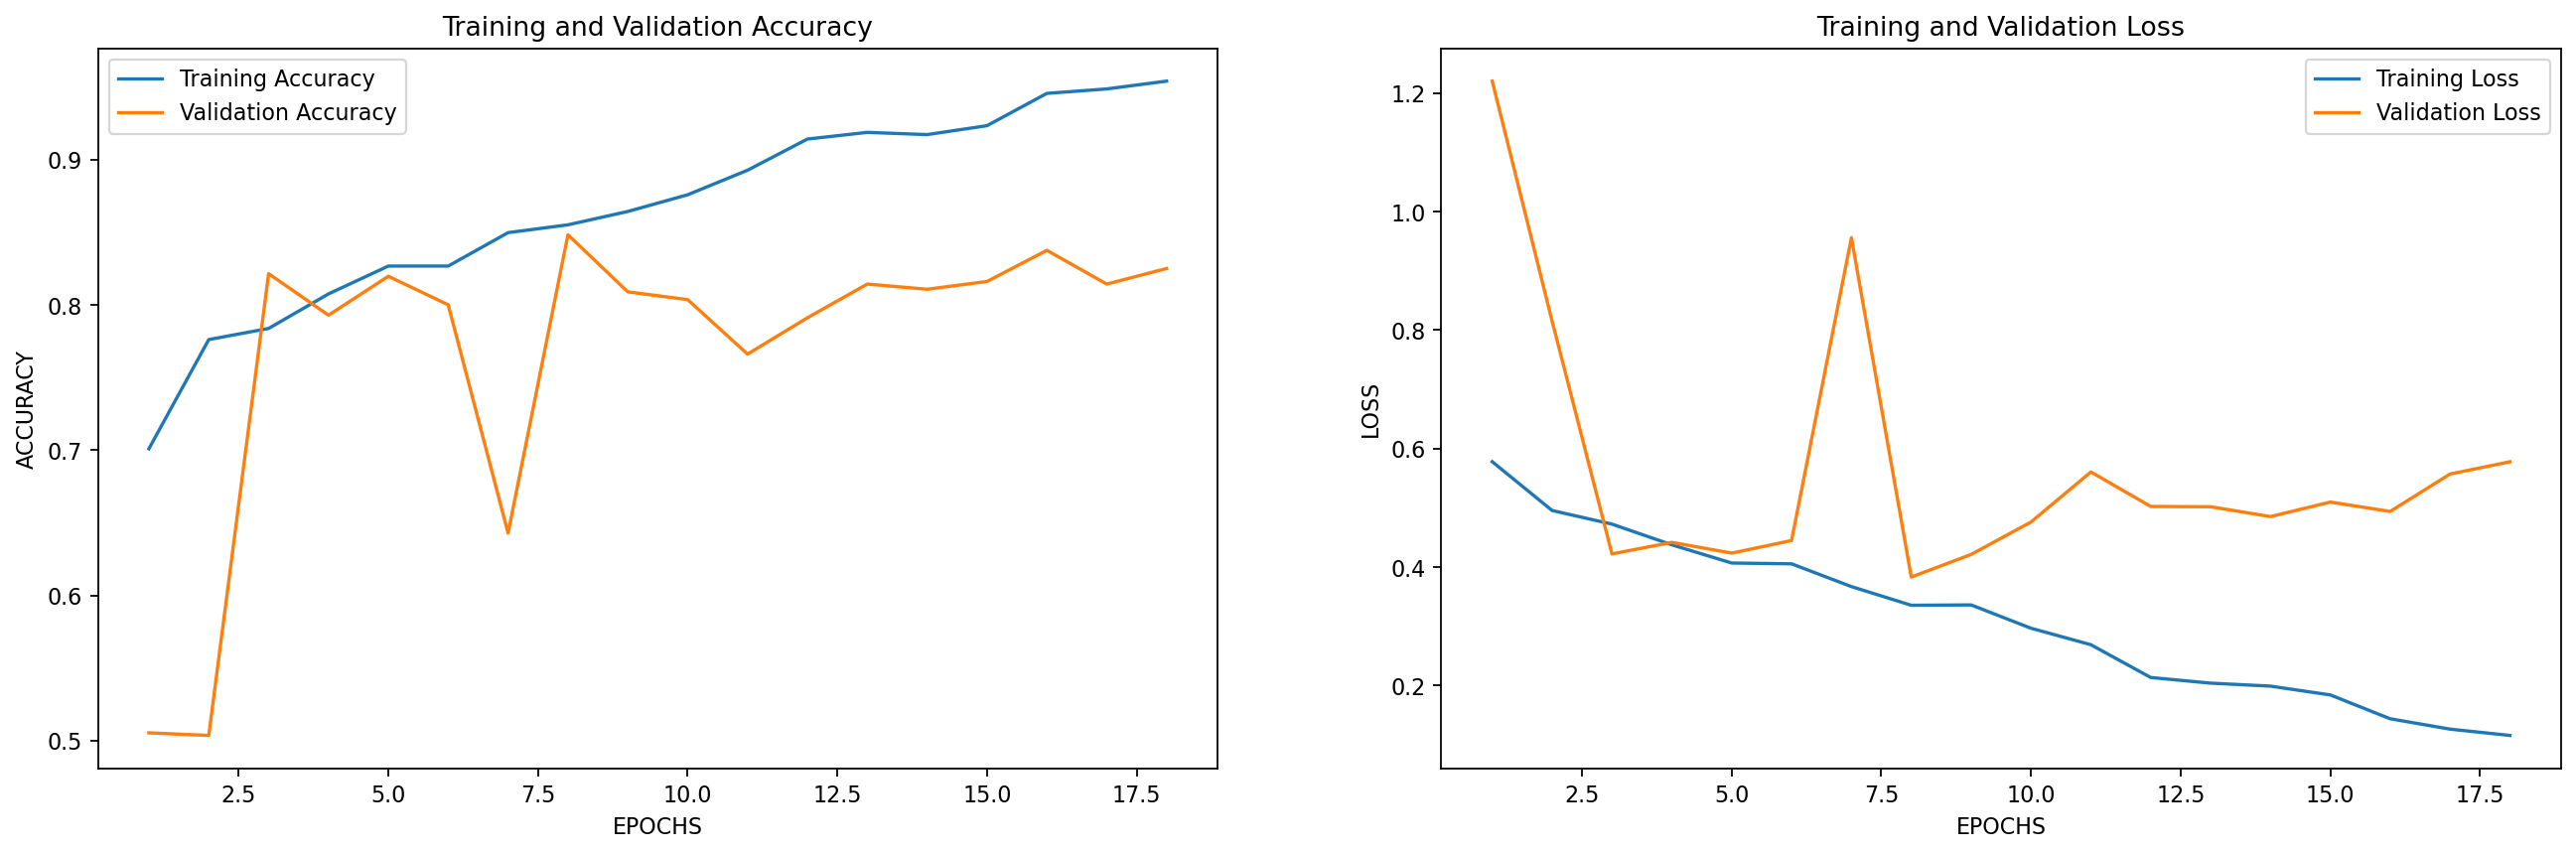

In [36]:
# Store history
utils.store_model_history(model_name, history.history)

# Plot training graphs
utils.plot_acc_loss(history.history)

26/26 [==============================] - 12s 487ms/step

Best cutoff Threshold = 0.315281, F-Score = 0.836

Evaluation Metrics:

Balanced Accuracy : 0.83
Precision : 0.82
Recall : 0.85
F1 Score: 0.84
ROC AUC Score : 0.88

Classification report : 
              precision    recall  f1-score   support

     Healthy       0.84      0.82      0.83       103
        Tear       0.82      0.85      0.84       105

    accuracy                           0.83       208
   macro avg       0.83      0.83      0.83       208
weighted avg       0.83      0.83      0.83       208


Confusion Matrix : 


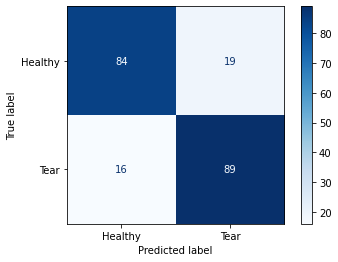

In [38]:
# Evaluate model
X_test_prob = MRNet_Model1.predict(utils.predict_batch_generator(X_test, BATCH_SIZE))

# Now get the correct labels based on the optimal threshold
optimal_threshold = utils.calculate_best_cutoff_threshold(y_test, X_test_prob)
X_test_pred = (X_test_prob >= optimal_threshold ).astype('int')

utils.evaluate_model(y_test, X_test_pred.tolist(), X_test_prob.tolist(), ['Healthy', 'Tear'])

## MRNet Model 2

In [40]:
model_name = 'MRNet_Model2'
MRNet_Model2 = models.mri_model_2(model_name, 2)
MRNet_Model2.compile(optimizer=keras.optimizers.Adam(learning_rate=utils.model_lr_schedule()),
                     loss='binary_crossentropy', 
                     metrics=['accuracy'])
MRNet_Model2.summary()

Model: "MRNet_Model2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_5 (Conv3D)           (None, 30, 256, 256, 16)  448       
                                                                 
 max_pooling3d_5 (MaxPooling  (None, 15, 128, 128, 16)  0        
 3D)                                                             
                                                                 
 batch_normalization_5 (Batc  (None, 15, 128, 128, 16)  64       
 hNormalization)                                                 
                                                                 
 conv3d_6 (Conv3D)           (None, 15, 128, 128, 32)  13856     
                                                                 
 max_pooling3d_6 (MaxPooling  (None, 8, 64, 64, 32)    0         
 3D)                                                             
                                                      

In [41]:
%%time
with tf.device('/device:GPU:0'):
    history = MRNet_Model2.fit(utils.batch_generator(X_train, y_train, BATCH_SIZE),
                               steps_per_epoch=len(X_train)//BATCH_SIZE,
                               epochs=EPOCHS,
                               validation_data=utils.batch_generator(X_valid, y_valid, BATCH_SIZE),
                               validation_steps=len(X_valid)//BATCH_SIZE, 
                               shuffle=True,
                               class_weight=mrnet_class_weights,
                               verbose=1,
                               callbacks=[utils.model_callback_checkpoint(model_name), utils.model_callback_earlystopping()])

Epoch 1/100
163/163 [==============================] - 73s 421ms/step - loss: 0.6596 - accuracy: 0.6572 - val_loss: 0.7482 - val_accuracy: 0.5054
Epoch 2/100
163/163 [==============================] - 68s 414ms/step - loss: 0.5460 - accuracy: 0.7462 - val_loss: 0.6914 - val_accuracy: 0.5429
Epoch 3/100
163/163 [==============================] - 68s 415ms/step - loss: 0.4946 - accuracy: 0.7799 - val_loss: 0.4758 - val_accuracy: 0.7857
Epoch 4/100
163/163 [==============================] - 68s 415ms/step - loss: 0.4436 - accuracy: 0.7975 - val_loss: 0.4520 - val_accuracy: 0.7821
Epoch 5/100
163/163 [==============================] - 67s 414ms/step - loss: 0.4107 - accuracy: 0.8183 - val_loss: 0.3953 - val_accuracy: 0.8429
Epoch 6/100
163/163 [==============================] - 67s 414ms/step - loss: 0.3447 - accuracy: 0.8551 - val_loss: 0.3899 - val_accuracy: 0.8232
Epoch 7/100
163/163 [==============================] - 68s 414ms/step - loss: 0.2803 - accuracy: 0.8880 - val_loss: 0.5396 -

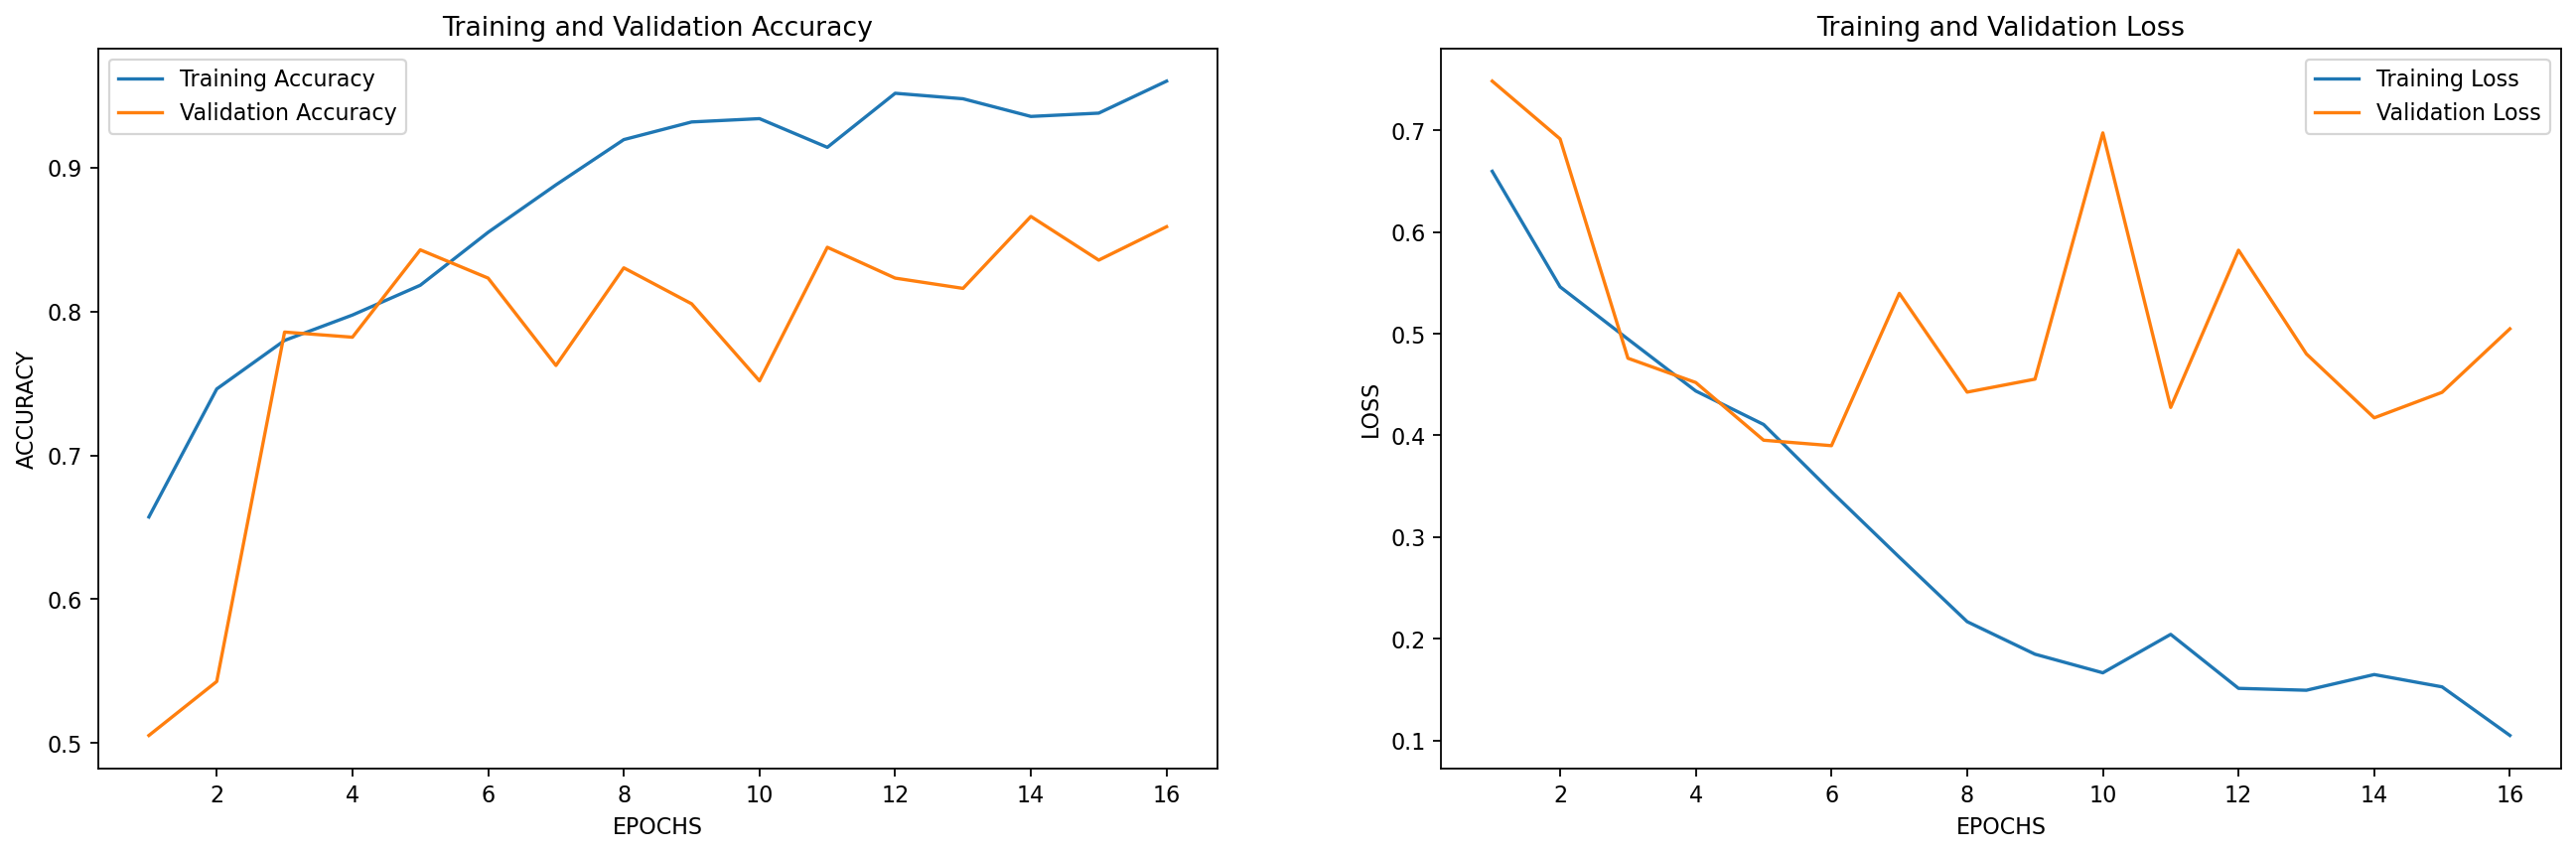

In [42]:
# Store history
utils.store_model_history(model_name, history.history)

# Plot training graphs
utils.plot_acc_loss(history.history)

26/26 [==============================] - 5s 183ms/step

Best cutoff Threshold = 0.442159, F-Score = 0.869

Evaluation Metrics:

Balanced Accuracy : 0.86
Precision : 0.83
Recall : 0.91
F1 Score: 0.87
ROC AUC Score : 0.92

Classification report : 
              precision    recall  f1-score   support

     Healthy       0.90      0.81      0.85       103
        Tear       0.83      0.91      0.87       105

    accuracy                           0.86       208
   macro avg       0.86      0.86      0.86       208
weighted avg       0.86      0.86      0.86       208


Confusion Matrix : 


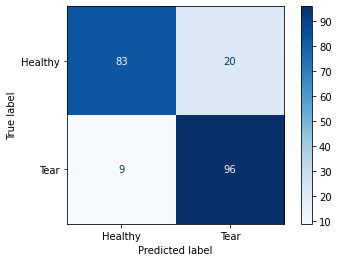

In [46]:
# Evaluate model
X_test_prob = MRNet_Model2.predict(utils.predict_batch_generator(X_test, BATCH_SIZE))

# Now get the correct labels based on the optimal threshold
optimal_threshold = utils.calculate_best_cutoff_threshold(y_test, X_test_prob)
X_test_pred = (X_test_prob >= optimal_threshold ).astype('int')

utils.evaluate_model(y_test, X_test_pred.tolist(), X_test_prob.tolist(), ['Healthy', 'Tear'])

## MRNet Model 3

In [44]:
model_name = 'MRNet_Model3'
MRNet_Model3 = models.mri_model_3(model_name, 2)
MRNet_Model3.compile(optimizer=keras.optimizers.Adam(learning_rate=utils.model_lr_schedule()),
                     loss='binary_crossentropy', 
                     metrics=['accuracy'])
MRNet_Model3.summary()

Model: "MRNet_Model3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_13 (Conv3D)          (None, 30, 256, 256, 32)  896       
                                                                 
 max_pooling3d_13 (MaxPoolin  (None, 15, 128, 128, 32)  0        
 g3D)                                                            
                                                                 
 batch_normalization_13 (Bat  (None, 15, 128, 128, 32)  128      
 chNormalization)                                                
                                                                 
 conv3d_14 (Conv3D)          (None, 15, 128, 128, 32)  27680     
                                                                 
 max_pooling3d_14 (MaxPoolin  (None, 8, 64, 64, 32)    0         
 g3D)                                                            
                                                      

In [45]:
%%time
with tf.device('/device:GPU:0'):
    history = MRNet_Model3.fit(utils.batch_generator(X_train, y_train, BATCH_SIZE),
                               steps_per_epoch=len(X_train)//BATCH_SIZE,
                               epochs=EPOCHS,
                               validation_data=utils.batch_generator(X_valid, y_valid, BATCH_SIZE),
                               validation_steps=len(X_valid)//BATCH_SIZE, 
                               shuffle=True,
                               class_weight=mrnet_class_weights,
                               verbose=1,
                               callbacks=[utils.model_callback_checkpoint(model_name), utils.model_callback_earlystopping()])

Epoch 1/100
163/163 [==============================] - 90s 507ms/step - loss: 0.6681 - accuracy: 0.6495 - val_loss: 0.6929 - val_accuracy: 0.5179
Epoch 2/100
163/163 [==============================] - 82s 503ms/step - loss: 0.5744 - accuracy: 0.7109 - val_loss: 0.6920 - val_accuracy: 0.5036
Epoch 3/100
163/163 [==============================] - 82s 503ms/step - loss: 0.5567 - accuracy: 0.7377 - val_loss: 0.5895 - val_accuracy: 0.7268
Epoch 4/100
163/163 [==============================] - 82s 503ms/step - loss: 0.5330 - accuracy: 0.7477 - val_loss: 0.4849 - val_accuracy: 0.7607
Epoch 5/100
163/163 [==============================] - 82s 503ms/step - loss: 0.4796 - accuracy: 0.7768 - val_loss: 0.4824 - val_accuracy: 0.7893
Epoch 6/100
163/163 [==============================] - 82s 503ms/step - loss: 0.4763 - accuracy: 0.7776 - val_loss: 0.4778 - val_accuracy: 0.7875
Epoch 7/100
163/163 [==============================] - 82s 501ms/step - loss: 0.4089 - accuracy: 0.8359 - val_loss: 0.5345 -

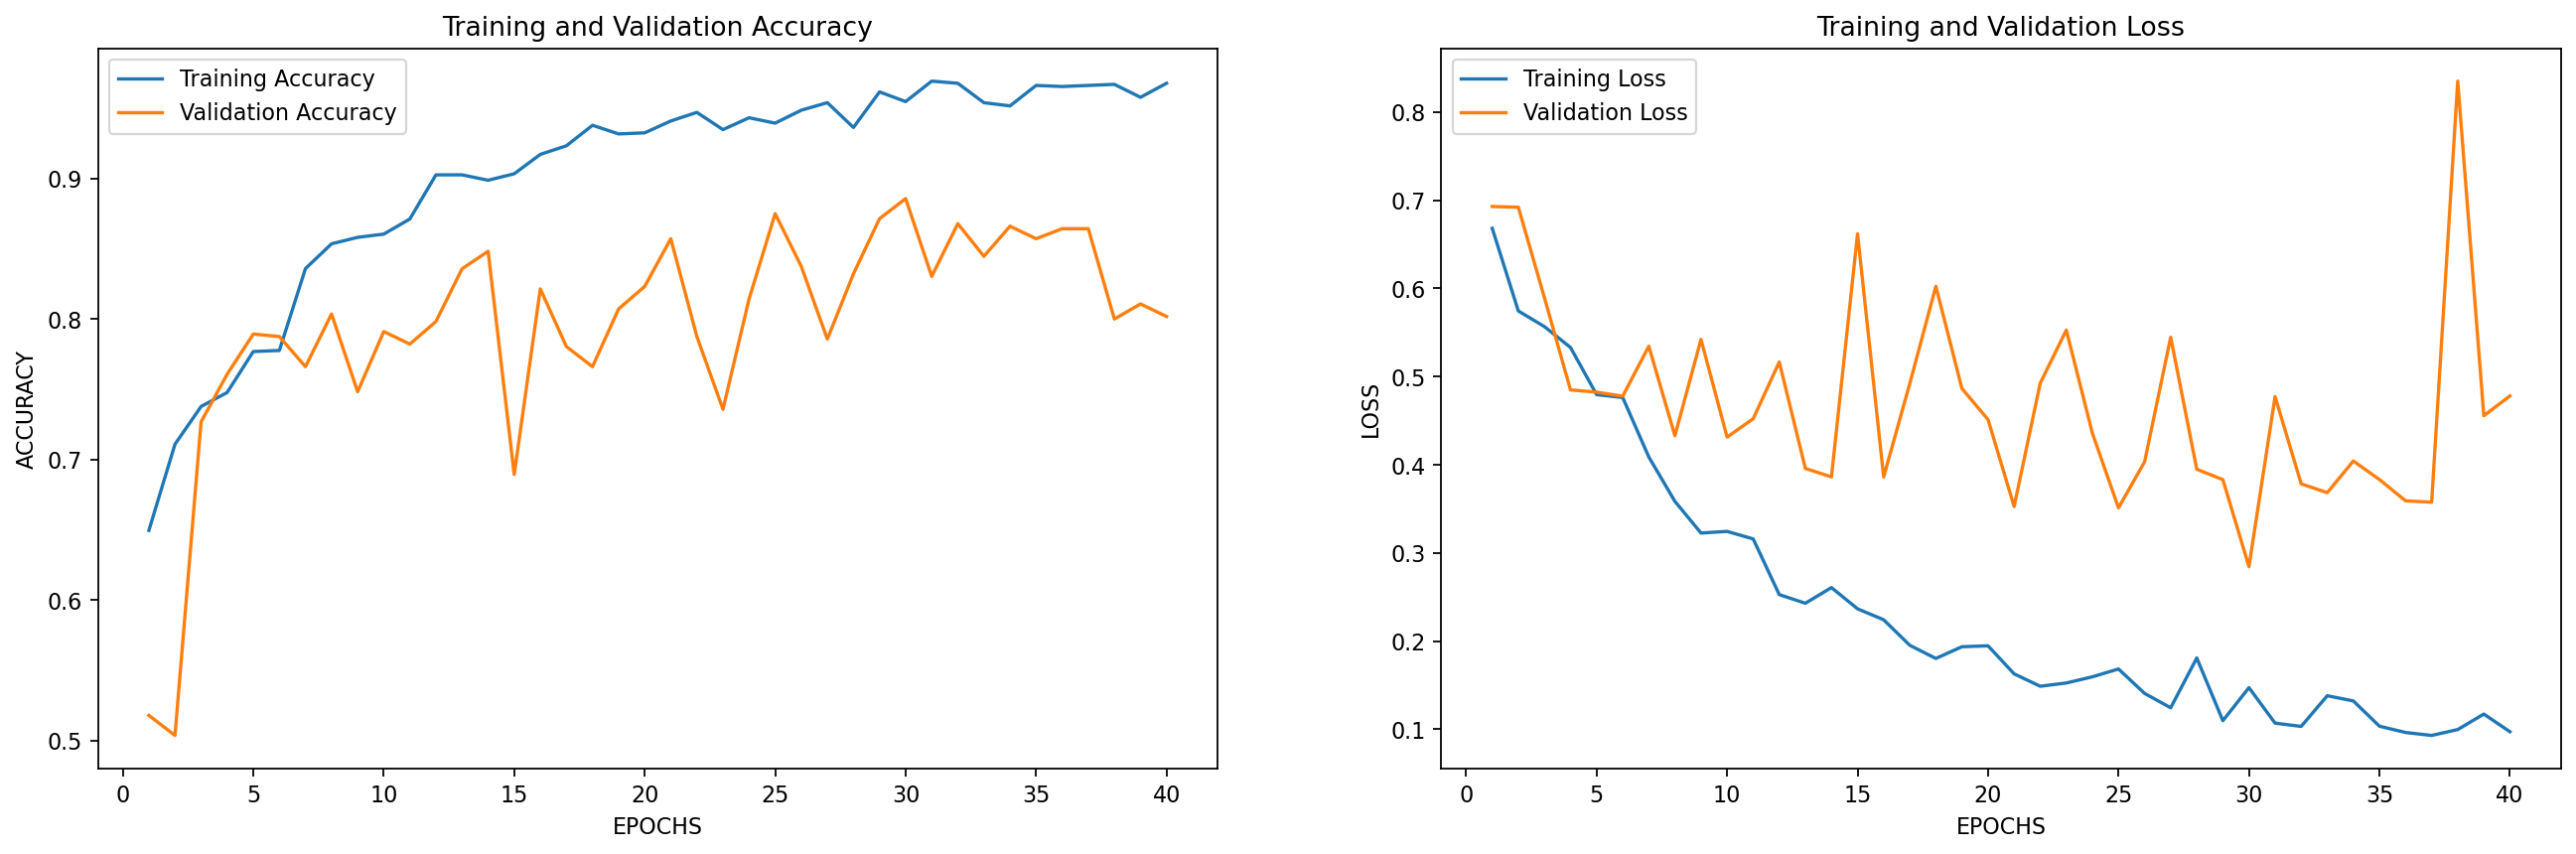

In [46]:
# Store history
utils.store_model_history(model_name, history.history)

# Plot training graphs
utils.plot_acc_loss(history.history)

26/26 [==============================] - 5s 185ms/step

Best cutoff Threshold = 0.429860, F-Score = 0.874

Evaluation Metrics:

Balanced Accuracy : 0.88
Precision : 0.89
Recall : 0.86
F1 Score: 0.87
ROC AUC Score : 0.93

Classification report : 
              precision    recall  f1-score   support

     Healthy       0.86      0.89      0.88       103
        Tear       0.89      0.86      0.87       105

    accuracy                           0.88       208
   macro avg       0.88      0.88      0.87       208
weighted avg       0.88      0.88      0.87       208


Confusion Matrix : 


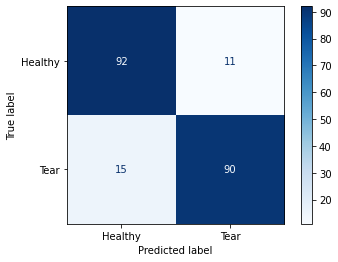

In [44]:
# Evaluate model
X_test_prob = MRNet_Model3.predict(utils.predict_batch_generator(X_test, BATCH_SIZE))

# Now get the correct labels based on the optimal threshold
optimal_threshold = utils.calculate_best_cutoff_threshold(y_test, X_test_prob)
X_test_pred = (X_test_prob >= optimal_threshold ).astype('int')

utils.evaluate_model(y_test, X_test_pred.tolist(), X_test_prob.tolist(), ['Healthy', 'Tear'])

## MRNet Model 4

In [48]:
model_name = 'MRNet_Model4'
MRNet_Model4 = models.mri_model_4(model_name, 2)
MRNet_Model4.compile(optimizer=keras.optimizers.Adam(learning_rate=utils.model_lr_schedule()),
                     loss='binary_crossentropy', 
                     metrics=['accuracy'])
MRNet_Model4.summary()

Model: "MRNet_Model4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_24 (Conv3D)          (None, 30, 256, 256, 32)  896       
                                                                 
 conv3d_25 (Conv3D)          (None, 30, 256, 256, 32)  27680     
                                                                 
 max_pooling3d_24 (MaxPoolin  (None, 15, 128, 128, 32)  0        
 g3D)                                                            
                                                                 
 conv3d_26 (Conv3D)          (None, 15, 128, 128, 32)  27680     
                                                                 
 conv3d_27 (Conv3D)          (None, 15, 128, 128, 64)  55360     
                                                                 
 max_pooling3d_25 (MaxPoolin  (None, 8, 64, 64, 64)    0         
 g3D)                                                 

In [49]:
%%time
with tf.device('/device:GPU:0'):
    history = MRNet_Model4.fit(utils.batch_generator(X_train, y_train, BATCH_SIZE),
                               steps_per_epoch=len(X_train)//BATCH_SIZE,
                               epochs=EPOCHS,
                               validation_data=utils.batch_generator(X_valid, y_valid, BATCH_SIZE),
                               validation_steps=len(X_valid)//BATCH_SIZE, 
                               shuffle=True,
                               class_weight=mrnet_class_weights,
                               verbose=1,
                               callbacks=[utils.model_callback_checkpoint(model_name), utils.model_callback_earlystopping()])

Epoch 1/100
163/163 [==============================] - 284s 1s/step - loss: 0.6381 - accuracy: 0.6549 - val_loss: 0.5337 - val_accuracy: 0.7196
Epoch 2/100
163/163 [==============================] - 212s 1s/step - loss: 0.5608 - accuracy: 0.7385 - val_loss: 0.4988 - val_accuracy: 0.7446
Epoch 3/100
163/163 [==============================] - 209s 1s/step - loss: 0.5307 - accuracy: 0.7546 - val_loss: 0.5483 - val_accuracy: 0.7268
Epoch 4/100
163/163 [==============================] - 212s 1s/step - loss: 0.4823 - accuracy: 0.7830 - val_loss: 0.4652 - val_accuracy: 0.7893
Epoch 5/100
163/163 [==============================] - 212s 1s/step - loss: 0.4312 - accuracy: 0.8198 - val_loss: 0.4373 - val_accuracy: 0.8304
Epoch 6/100
163/163 [==============================] - 209s 1s/step - loss: 0.3741 - accuracy: 0.8482 - val_loss: 0.5070 - val_accuracy: 0.7964
Epoch 7/100
163/163 [==============================] - 212s 1s/step - loss: 0.3096 - accuracy: 0.8758 - val_loss: 0.4229 - val_accuracy:

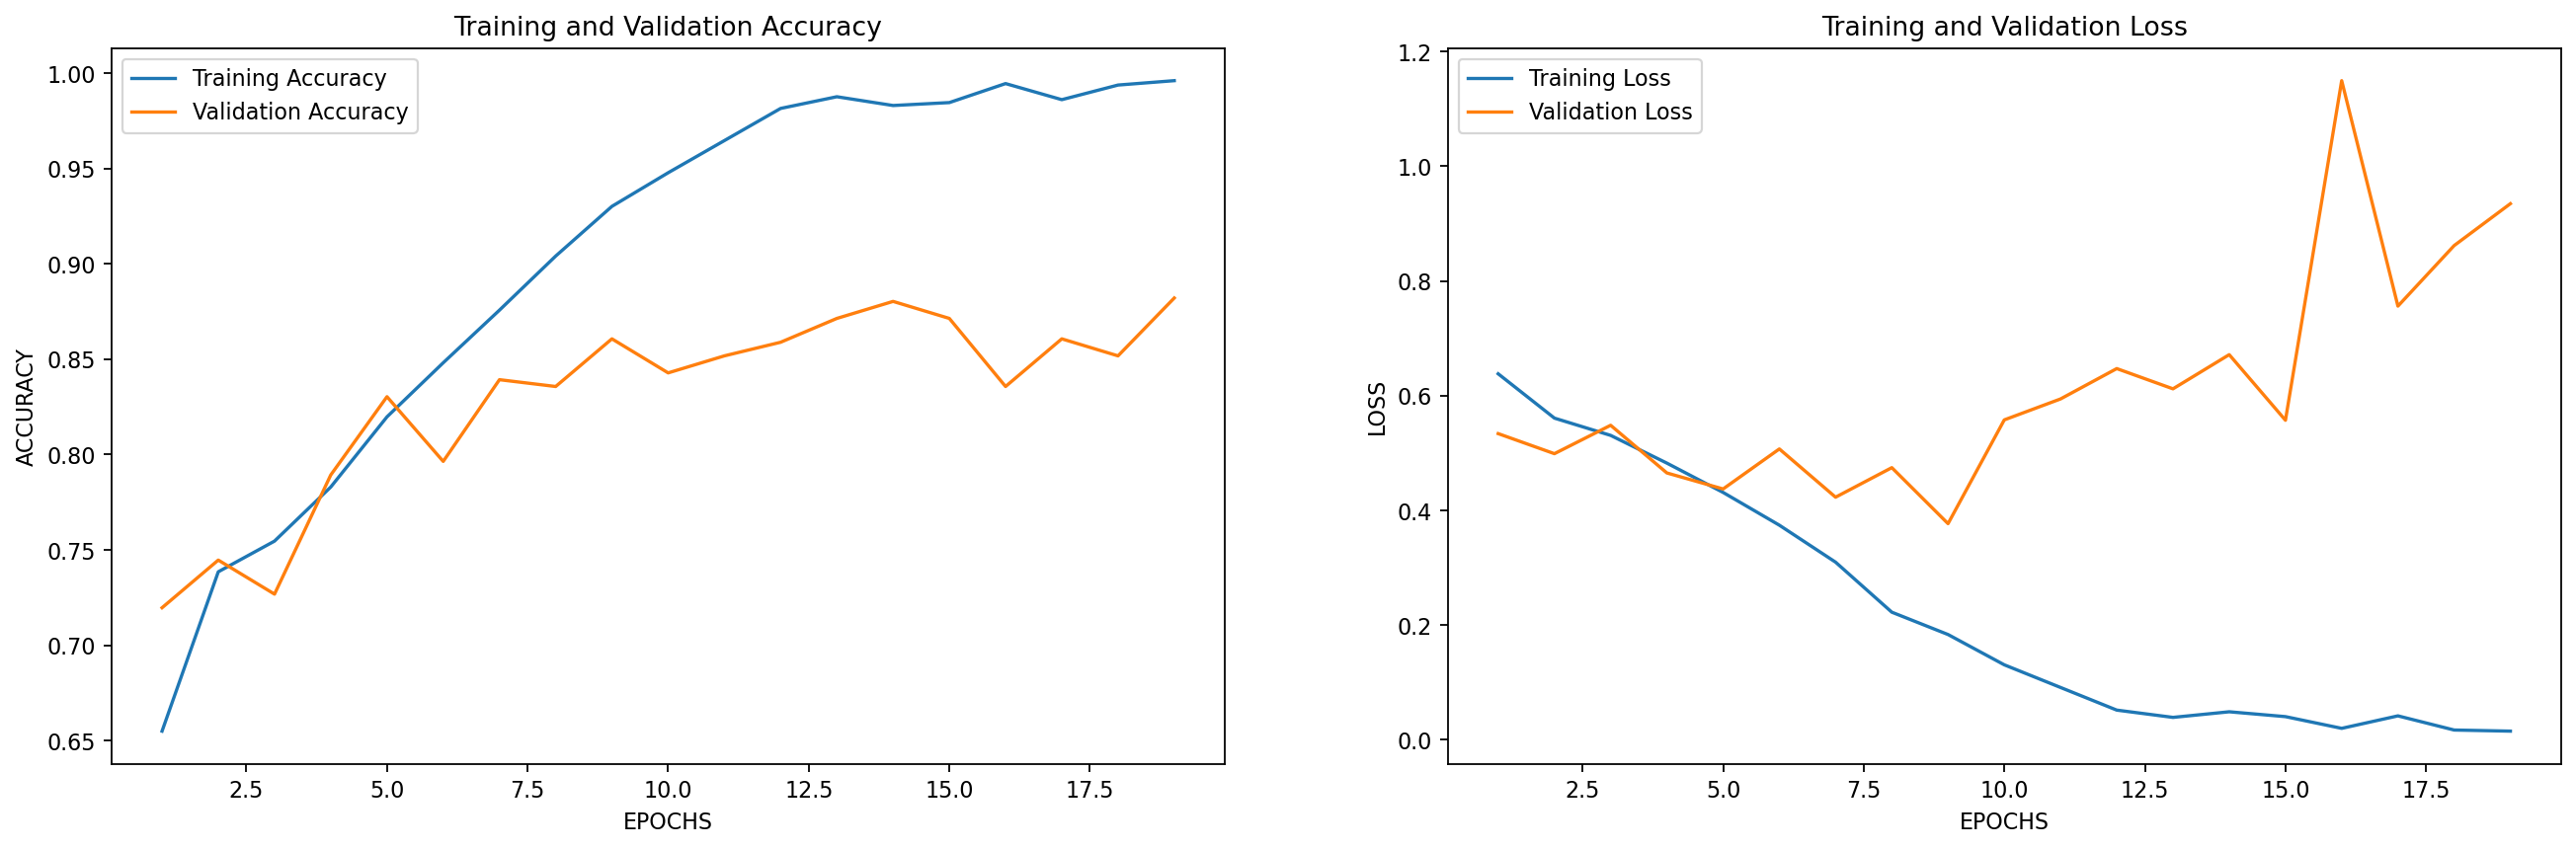

In [50]:
# Store history
utils.store_model_history(model_name, history.history)

# Plot training graphs
utils.plot_acc_loss(history.history)

26/26 [==============================] - 14s 488ms/step

Best cutoff Threshold = 0.249402, F-Score = 0.857

Evaluation Metrics:

Balanced Accuracy : 0.85
Precision : 0.81
Recall : 0.91
F1 Score: 0.86
ROC AUC Score : 0.93

Classification report : 
              precision    recall  f1-score   support

     Healthy       0.90      0.78      0.83       103
        Tear       0.81      0.91      0.86       105

    accuracy                           0.85       208
   macro avg       0.85      0.85      0.85       208
weighted avg       0.85      0.85      0.85       208


Confusion Matrix : 


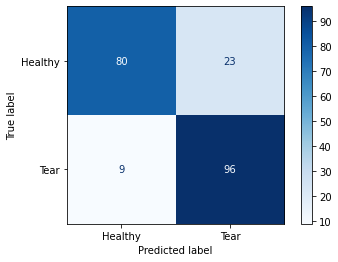

In [42]:
# Evaluate model
X_test_prob = MRNet_Model4.predict(utils.predict_batch_generator(X_test, BATCH_SIZE))

# Now get the correct labels based on the optimal threshold
optimal_threshold = utils.calculate_best_cutoff_threshold(y_test, X_test_prob)
X_test_pred = (X_test_prob >= optimal_threshold ).astype('int')

utils.evaluate_model(y_test, X_test_pred.tolist(), X_test_prob.tolist(), ['Healthy', 'Tear'])

## MRNet Model 5

In [52]:
model_name = 'MRNet_Model5'
MRNet_Model5 = models.mri_model_5(model_name, 2)
MRNet_Model5.compile(optimizer=keras.optimizers.Adam(learning_rate=utils.model_lr_schedule()), 
                     loss='binary_crossentropy',
                     metrics=['accuracy'])
MRNet_Model5.summary()

Model: "MRNet_Model5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_30 (Conv3D)          (None, 30, 256, 256, 16)  448       
                                                                 
 max_pooling3d_27 (MaxPoolin  (None, 15, 128, 128, 16)  0        
 g3D)                                                            
                                                                 
 conv3d_31 (Conv3D)          (None, 15, 128, 128, 16)  6928      
                                                                 
 max_pooling3d_28 (MaxPoolin  (None, 8, 64, 64, 16)    0         
 g3D)                                                            
                                                                 
 conv3d_32 (Conv3D)          (None, 8, 64, 64, 32)     13856     
                                                                 
 max_pooling3d_29 (MaxPoolin  (None, 4, 32, 32, 32)   

In [53]:
%%time
with tf.device('/device:GPU:0'):
    history = MRNet_Model5.fit(utils.batch_generator(X_train, y_train, BATCH_SIZE),
                               steps_per_epoch=len(X_train)//BATCH_SIZE,
                               epochs=EPOCHS,
                               validation_data=utils.batch_generator(X_valid, y_valid, BATCH_SIZE),
                               validation_steps=len(X_valid)//BATCH_SIZE, 
                               shuffle=True,
                               class_weight=mrnet_class_weights,
                               verbose=1,
                               callbacks=[utils.model_callback_checkpoint(model_name), utils.model_callback_earlystopping()])

Epoch 1/100
163/163 [==============================] - 67s 403ms/step - loss: 0.6934 - accuracy: 0.4962 - val_loss: 0.6932 - val_accuracy: 0.4946
Epoch 2/100
163/163 [==============================] - 65s 397ms/step - loss: 0.6933 - accuracy: 0.4716 - val_loss: 0.6931 - val_accuracy: 0.4964
Epoch 3/100
163/163 [==============================] - 64s 395ms/step - loss: 0.6135 - accuracy: 0.6526 - val_loss: 0.5917 - val_accuracy: 0.7107
Epoch 4/100
163/163 [==============================] - 65s 396ms/step - loss: 0.5354 - accuracy: 0.7431 - val_loss: 0.5510 - val_accuracy: 0.7054
Epoch 5/100
163/163 [==============================] - 64s 395ms/step - loss: 0.4960 - accuracy: 0.7715 - val_loss: 0.5025 - val_accuracy: 0.7696
Epoch 6/100
163/163 [==============================] - 64s 394ms/step - loss: 0.4682 - accuracy: 0.7952 - val_loss: 0.4819 - val_accuracy: 0.7661
Epoch 7/100
163/163 [==============================] - 64s 395ms/step - loss: 0.4390 - accuracy: 0.8090 - val_loss: 0.4899 -

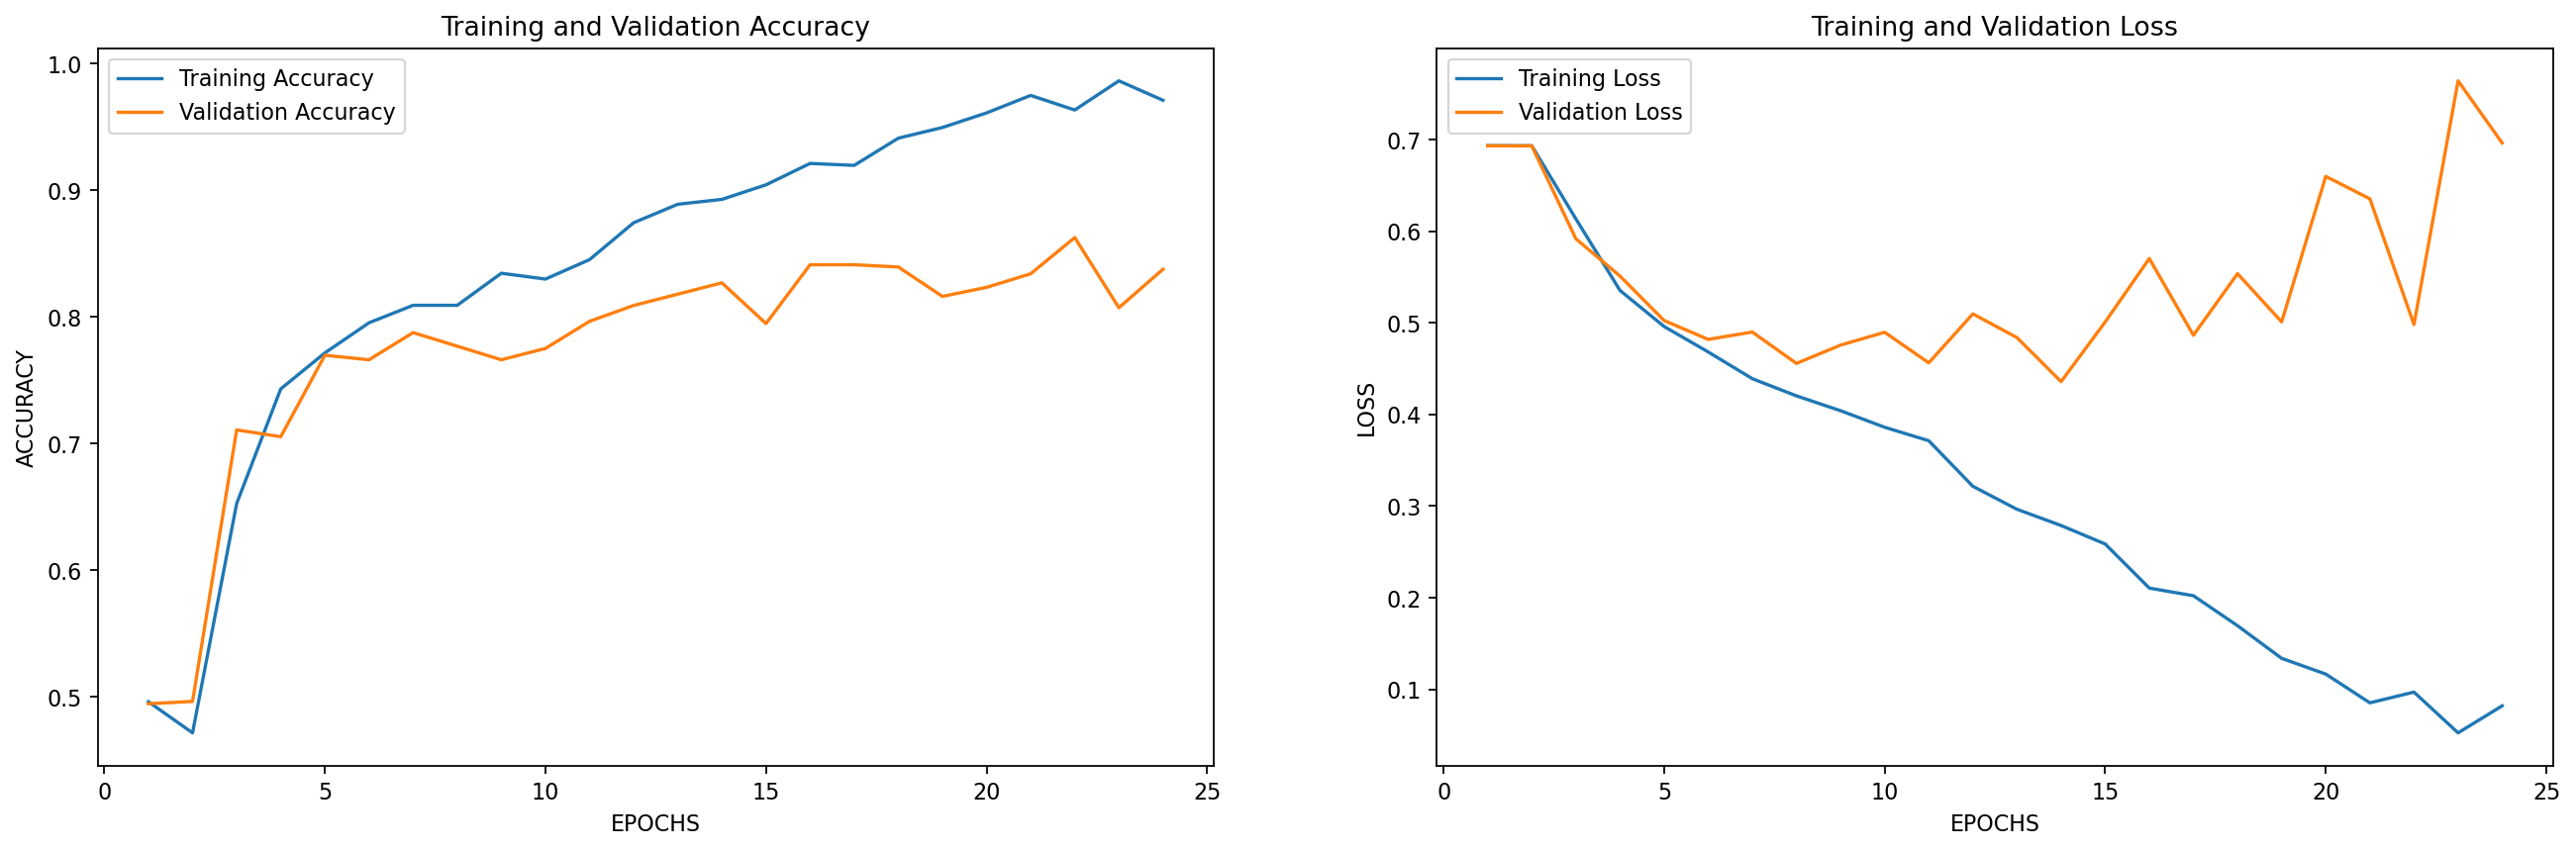

In [54]:
# Store history
utils.store_model_history(model_name, history.history)

# Plot training graphs
utils.plot_acc_loss(history.history)

26/26 [==============================] - 5s 199ms/step

Best cutoff Threshold = 0.246566, F-Score = 0.833

Evaluation Metrics:

Balanced Accuracy : 0.81
Precision : 0.76
Recall : 0.92
F1 Score: 0.83
ROC AUC Score : 0.9

Classification report : 
              precision    recall  f1-score   support

     Healthy       0.90      0.70      0.79       103
        Tear       0.76      0.92      0.83       105

    accuracy                           0.81       208
   macro avg       0.83      0.81      0.81       208
weighted avg       0.83      0.81      0.81       208


Confusion Matrix : 


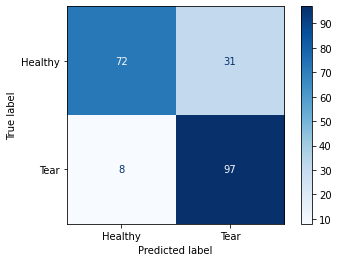

In [40]:
# Evaluate model
X_test_prob = MRNet_Model5.predict(utils.predict_batch_generator(X_test, BATCH_SIZE))

# Now get the correct labels based on the optimal threshold
optimal_threshold = utils.calculate_best_cutoff_threshold(y_test, X_test_prob)
X_test_pred = (X_test_prob >= optimal_threshold ).astype('int')

utils.evaluate_model(y_test, X_test_pred.tolist(), X_test_prob.tolist(), ['Healthy', 'Tear'])

## MRNet Model 6

In [34]:
model_name = 'MRNet_Model6'
MRNet_Model6 = models.mri_model_6(model_name, 2)
MRNet_Model6.compile(optimizer=keras.optimizers.Adam(learning_rate=utils.model_lr_schedule()), 
                     loss='binary_crossentropy', 
                     metrics=['accuracy'])
MRNet_Model6.summary()

Model: "MRNet_Model6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 30, 256, 256, 8)   224       
                                                                 
 conv3d_1 (Conv3D)           (None, 30, 256, 256, 16)  3472      
                                                                 
 max_pooling3d (MaxPooling3D  (None, 15, 128, 128, 16)  0        
 )                                                               
                                                                 
 conv3d_2 (Conv3D)           (None, 15, 128, 128, 16)  6928      
                                                                 
 conv3d_3 (Conv3D)           (None, 15, 128, 128, 16)  6928      
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 8, 64, 64, 16)    0         
 3D)                                                  

In [35]:
%%time
with tf.device('/device:GPU:0'):
    history = MRNet_Model6.fit(utils.batch_generator(X_train, y_train, BATCH_SIZE),
                               steps_per_epoch=len(X_train)//BATCH_SIZE,
                               epochs=EPOCHS,
                               validation_data=utils.batch_generator(X_valid, y_valid, BATCH_SIZE),
                               validation_steps=len(X_valid)//BATCH_SIZE, 
                               shuffle=True,
                               class_weight=mrnet_class_weights,
                               verbose=1,
                               callbacks=[utils.model_callback_checkpoint(model_name), utils.model_callback_earlystopping()])

Epoch 1/100
163/163 [==============================] - 123s 573ms/step - loss: 0.6529 - accuracy: 0.5721 - val_loss: 0.6934 - val_accuracy: 0.4946
Epoch 2/100
163/163 [==============================] - 90s 553ms/step - loss: 0.5759 - accuracy: 0.7278 - val_loss: 0.7052 - val_accuracy: 0.4964
Epoch 3/100
163/163 [==============================] - 94s 576ms/step - loss: 0.5312 - accuracy: 0.7500 - val_loss: 0.5983 - val_accuracy: 0.7429
Epoch 4/100
163/163 [==============================] - 100s 616ms/step - loss: 0.4856 - accuracy: 0.7753 - val_loss: 0.6886 - val_accuracy: 0.5339
Epoch 5/100
163/163 [==============================] - 92s 562ms/step - loss: 0.4223 - accuracy: 0.8106 - val_loss: 0.5676 - val_accuracy: 0.7518
Epoch 6/100
163/163 [==============================] - 90s 554ms/step - loss: 0.4069 - accuracy: 0.8198 - val_loss: 0.4733 - val_accuracy: 0.7857
Epoch 7/100
163/163 [==============================] - 90s 554ms/step - loss: 0.3462 - accuracy: 0.8612 - val_loss: 0.4599

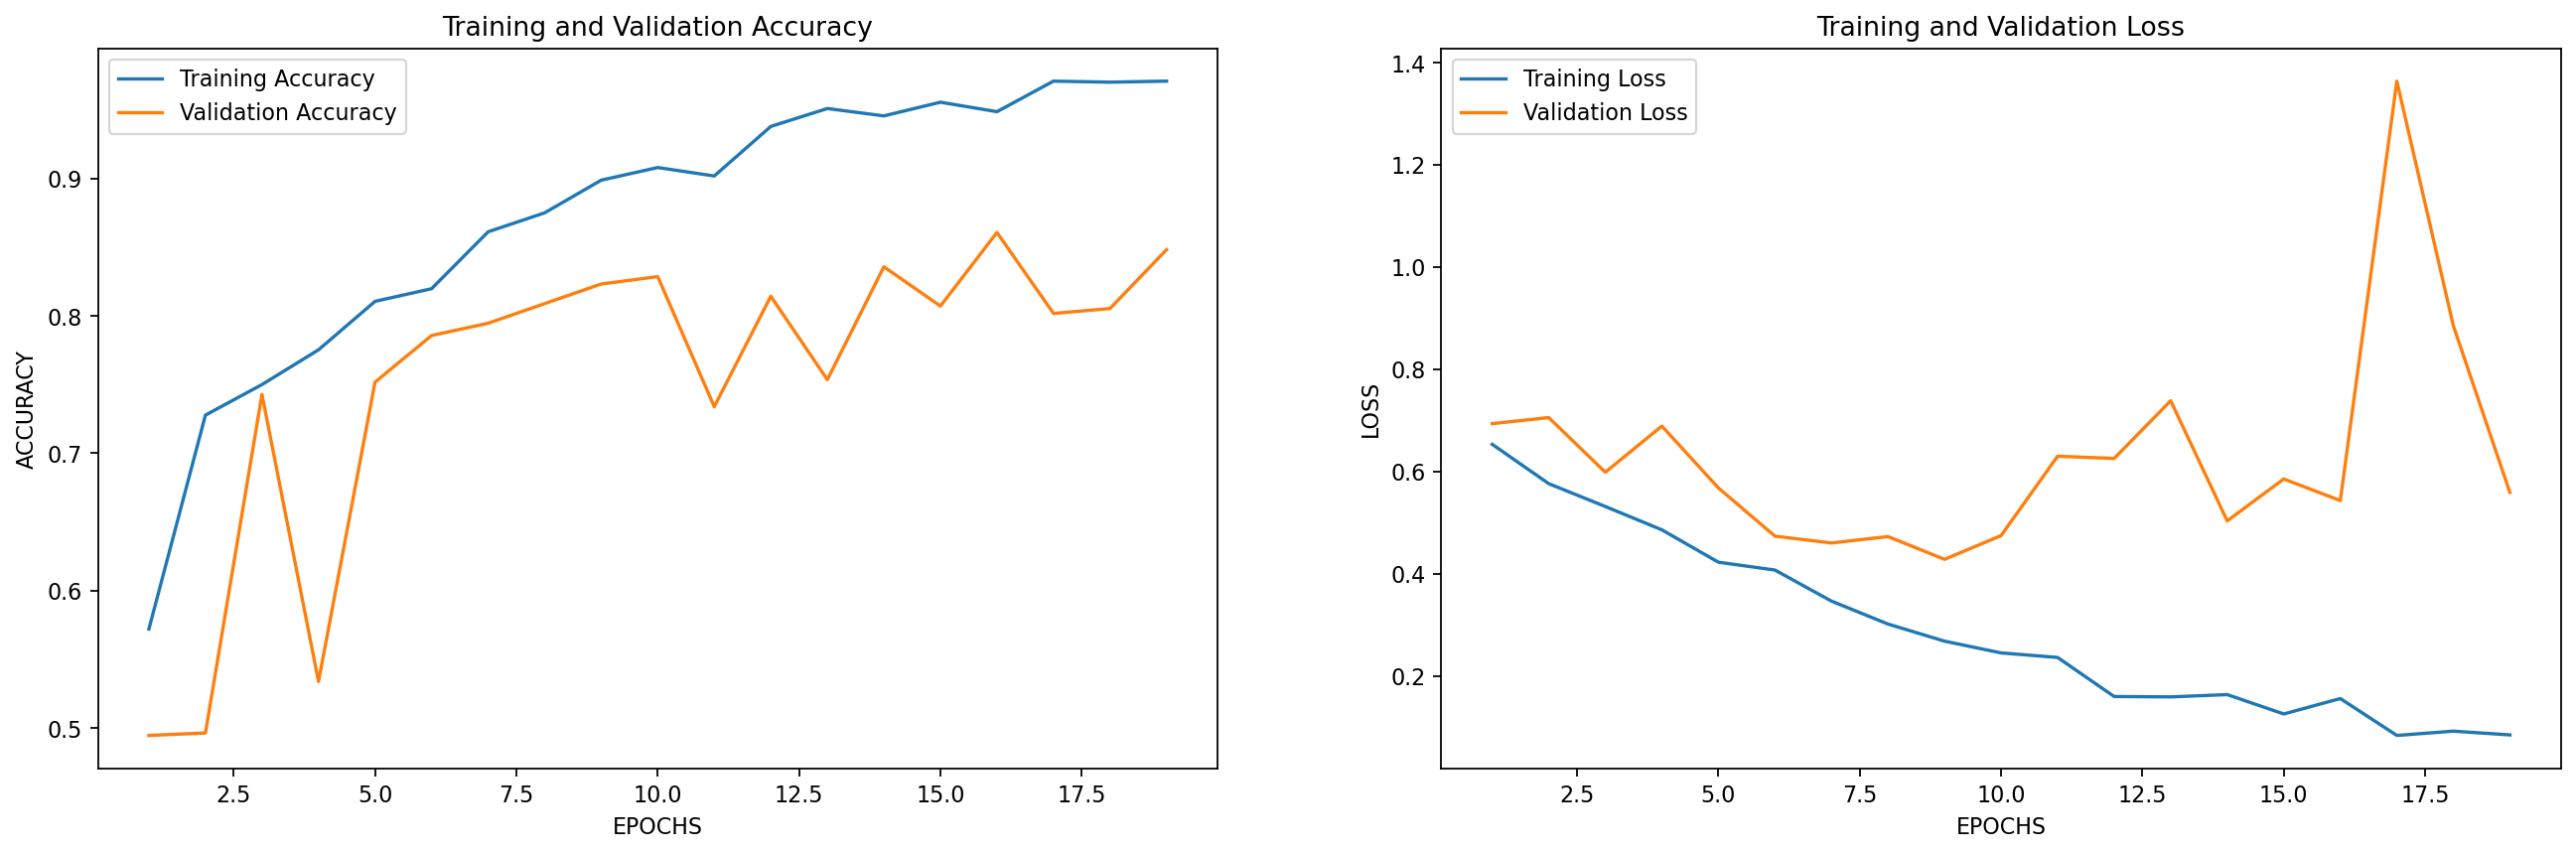

In [36]:
# Store history
utils.store_model_history(model_name, history.history)

# Plot training graphs
utils.plot_acc_loss(history.history)

26/26 [==============================] - 7s 280ms/step

Best cutoff Threshold = 0.523336, F-Score = 0.826

Evaluation Metrics:

Balanced Accuracy : 0.82
Precision : 0.8
Recall : 0.86
F1 Score: 0.83
ROC AUC Score : 0.88

Classification report : 
              precision    recall  f1-score   support

     Healthy       0.84      0.78      0.81       103
        Tear       0.80      0.86      0.83       105

    accuracy                           0.82       208
   macro avg       0.82      0.82      0.82       208
weighted avg       0.82      0.82      0.82       208


Confusion Matrix : 


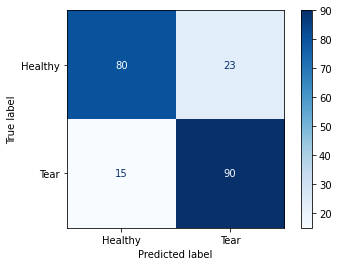

In [38]:
# Evaluate model
X_test_prob = MRNet_Model6.predict(utils.predict_batch_generator(X_test, BATCH_SIZE))

# Now get the correct labels based on the optimal threshold
optimal_threshold = utils.calculate_best_cutoff_threshold(y_test, X_test_prob)
X_test_pred = (X_test_prob >= optimal_threshold ).astype('int')

utils.evaluate_model(y_test, X_test_pred.tolist(), X_test_prob.tolist(), ['Healthy', 'Tear'])